In [9]:
# %run "ML_Project.ipynb"



Index(['months_as_customer', 'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital_gains', 'capital_loss',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'auto_make', 'auto_model',
       'fraud_reported', 'z_score'],
      dtype='object')

In [18]:
# Rgagde Mohamed Sid Abdalla
def logistic_function(x):
    return 1 / (1 + np.exp(-x))

# Rgagde Mohamed Sid Abdalla
def initialisation(X):
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    return (W, b)
# Rgagde Mohamed Sid Abdalla
def modele(X, W, b):
    Z = X.dot(W) + b
    A = logistic_function(Z)
    # print(A.shape)
    return A
def optimisation(X, W, b, A, y, learning_rate):
    dW, db = gradients(X, A, y)
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return (W, b)
def log_loss(y, A):
    return 1/len(y) * np.sum(-y * np.log(A) - (1 - y) * np.log(1 - A))   

def gradients(X, A, y):
    dW = 1/len(y) * np.dot(X.T, A - y)
    db = 1/len(y) * np.sum(A - y)
    return (dW, db) 

Accuracy: 1.0


In [50]:
class LogisticRegression:
    def __init__(self):
        self.W = None
        self.b = None

    def logistic_function(self, x):
        return 1 / (1 + np.exp(-x))

    def initialize_parameters(self, X):
        self.W = np.random.randn(X.shape[1], 1)
        self.b = np.random.randn(1)

    def model(self, X):
        Z = X.dot(self.W) + self.b
        A = self.logistic_function(Z)
        return A

    def gradients(self, X, A, y):
        dW = 1 / len(y) * np.dot(X.T, A - y)
        db = 1 / len(y) * np.sum(A - y)
        return (dW, db)

    def optimisation(self, X, A, y, learning_rate):
        dW, db = self.gradients(X, A, y)
        self.W = self.W - learning_rate * dW
        self.b = self.b - learning_rate * db

    def log_loss(self, y, A):
        return 1 / len(y) * np.sum(-y * np.log(A) - (1 - y) * np.log(1 - A))

    def predict(self, X):
        A = self.model(X)
        return A >= 0.5

    def train(self, X, y, learning_rate, num_iterations):
        self.initialize_parameters(X)
        losses = []
        accuracies = []

        for i in range(num_iterations):
            A = self.model(X)
            loss = self.log_loss(y, A)
            accuracy = np.mean((A >= 0.5) == y)

            self.optimisation(X, A, y, learning_rate)

            losses.append(loss)
            accuracies.append(accuracy)

            if (i + 1) % 100 == 0:
                print(f"Iteration: {i+1}\tLoss: {loss}\tAccuracy: {accuracy}")

        return losses, accuracies
    def plot_accuracy(self, accuracies):
        iterations = range(1, len(accuracies) + 1)
        plt.plot(iterations, accuracies)
        plt.xlabel("Iteration")
        plt.ylabel("Accuracy")
        plt.title("Accuracy Evolution")
        plt.show()
        
    def plot_loss(self, losses):
        iterations = range(1, len(losses) + 1)
        plt.plot(iterations, losses)
        plt.xlabel("Iteration")
        plt.ylabel("Loss")
        plt.title("Loss Evolution")
        plt.show()

In [51]:
model = LogisticRegression()
losses, accuracies = model.train(X, y, learning_rate=0.01, num_iterations=1200)

Iteration: 100	Loss: 1.3687717947595264	Accuracy: 0.5894160583941606
Iteration: 200	Loss: 1.0683330021886879	Accuracy: 0.6532846715328468
Iteration: 300	Loss: 0.8239228766033666	Accuracy: 0.7062043795620438
Iteration: 400	Loss: 0.6307905830262402	Accuracy: 0.75
Iteration: 500	Loss: 0.4819259665518734	Accuracy: 0.8102189781021898
Iteration: 600	Loss: 0.3694309724530411	Accuracy: 0.8594890510948905
Iteration: 700	Loss: 0.2856985729321277	Accuracy: 0.8795620437956204
Iteration: 800	Loss: 0.22398491496512232	Accuracy: 0.906934306569343
Iteration: 900	Loss: 0.17863011598942055	Accuracy: 0.9361313868613139
Iteration: 1000	Loss: 0.14515366333046048	Accuracy: 0.9507299270072993
Iteration: 1100	Loss: 0.12020032385701306	Accuracy: 0.968978102189781
Iteration: 1200	Loss: 0.10135228291671006	Accuracy: 0.9744525547445255


In [52]:
y_pred = model.predict(X)
accuracy = accuracy_score(y, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9762773722627737


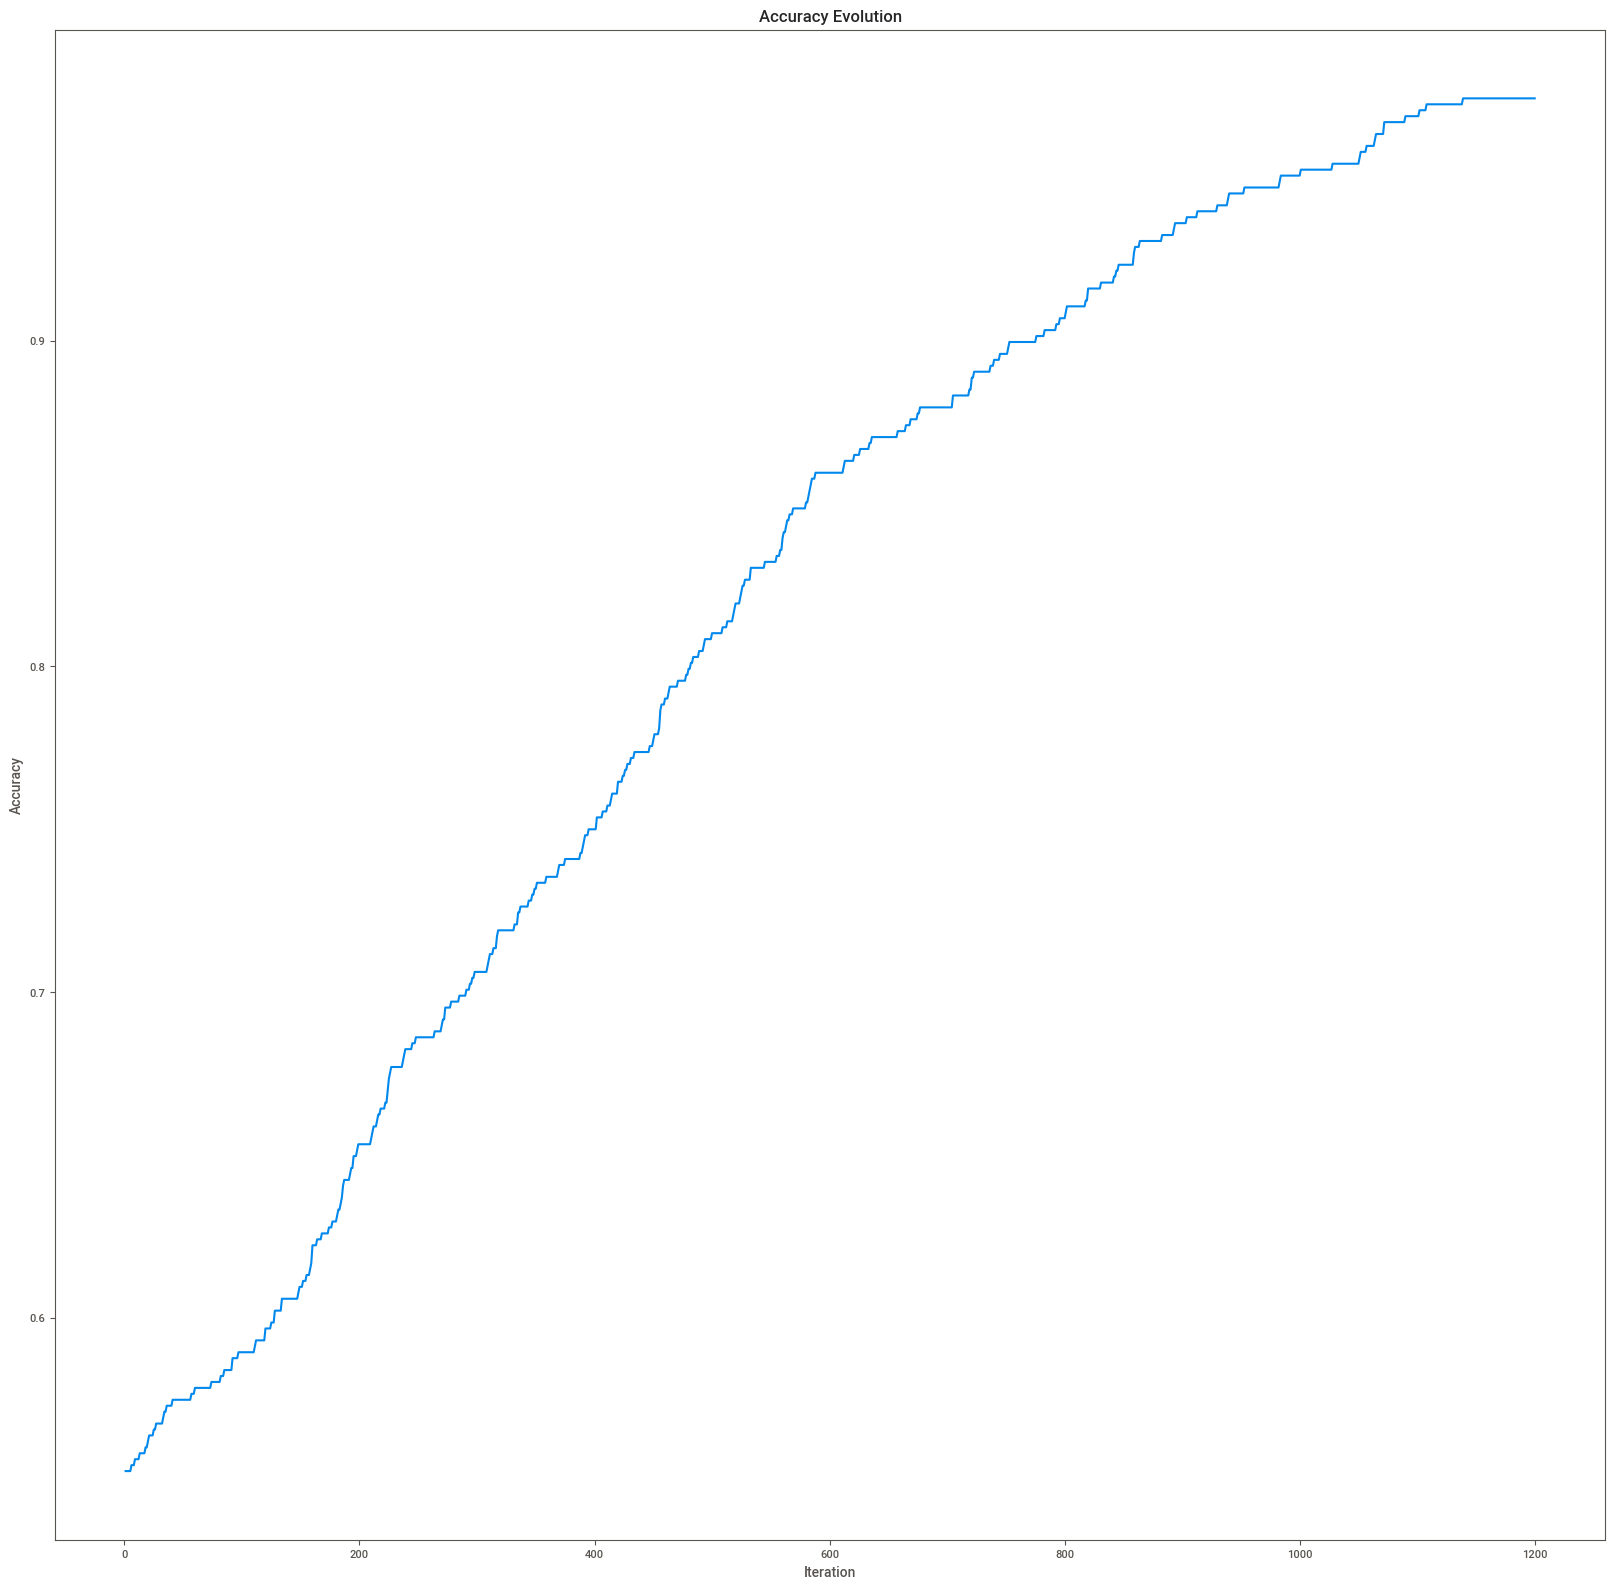

In [53]:
model.plot_accuracy(accuracies)

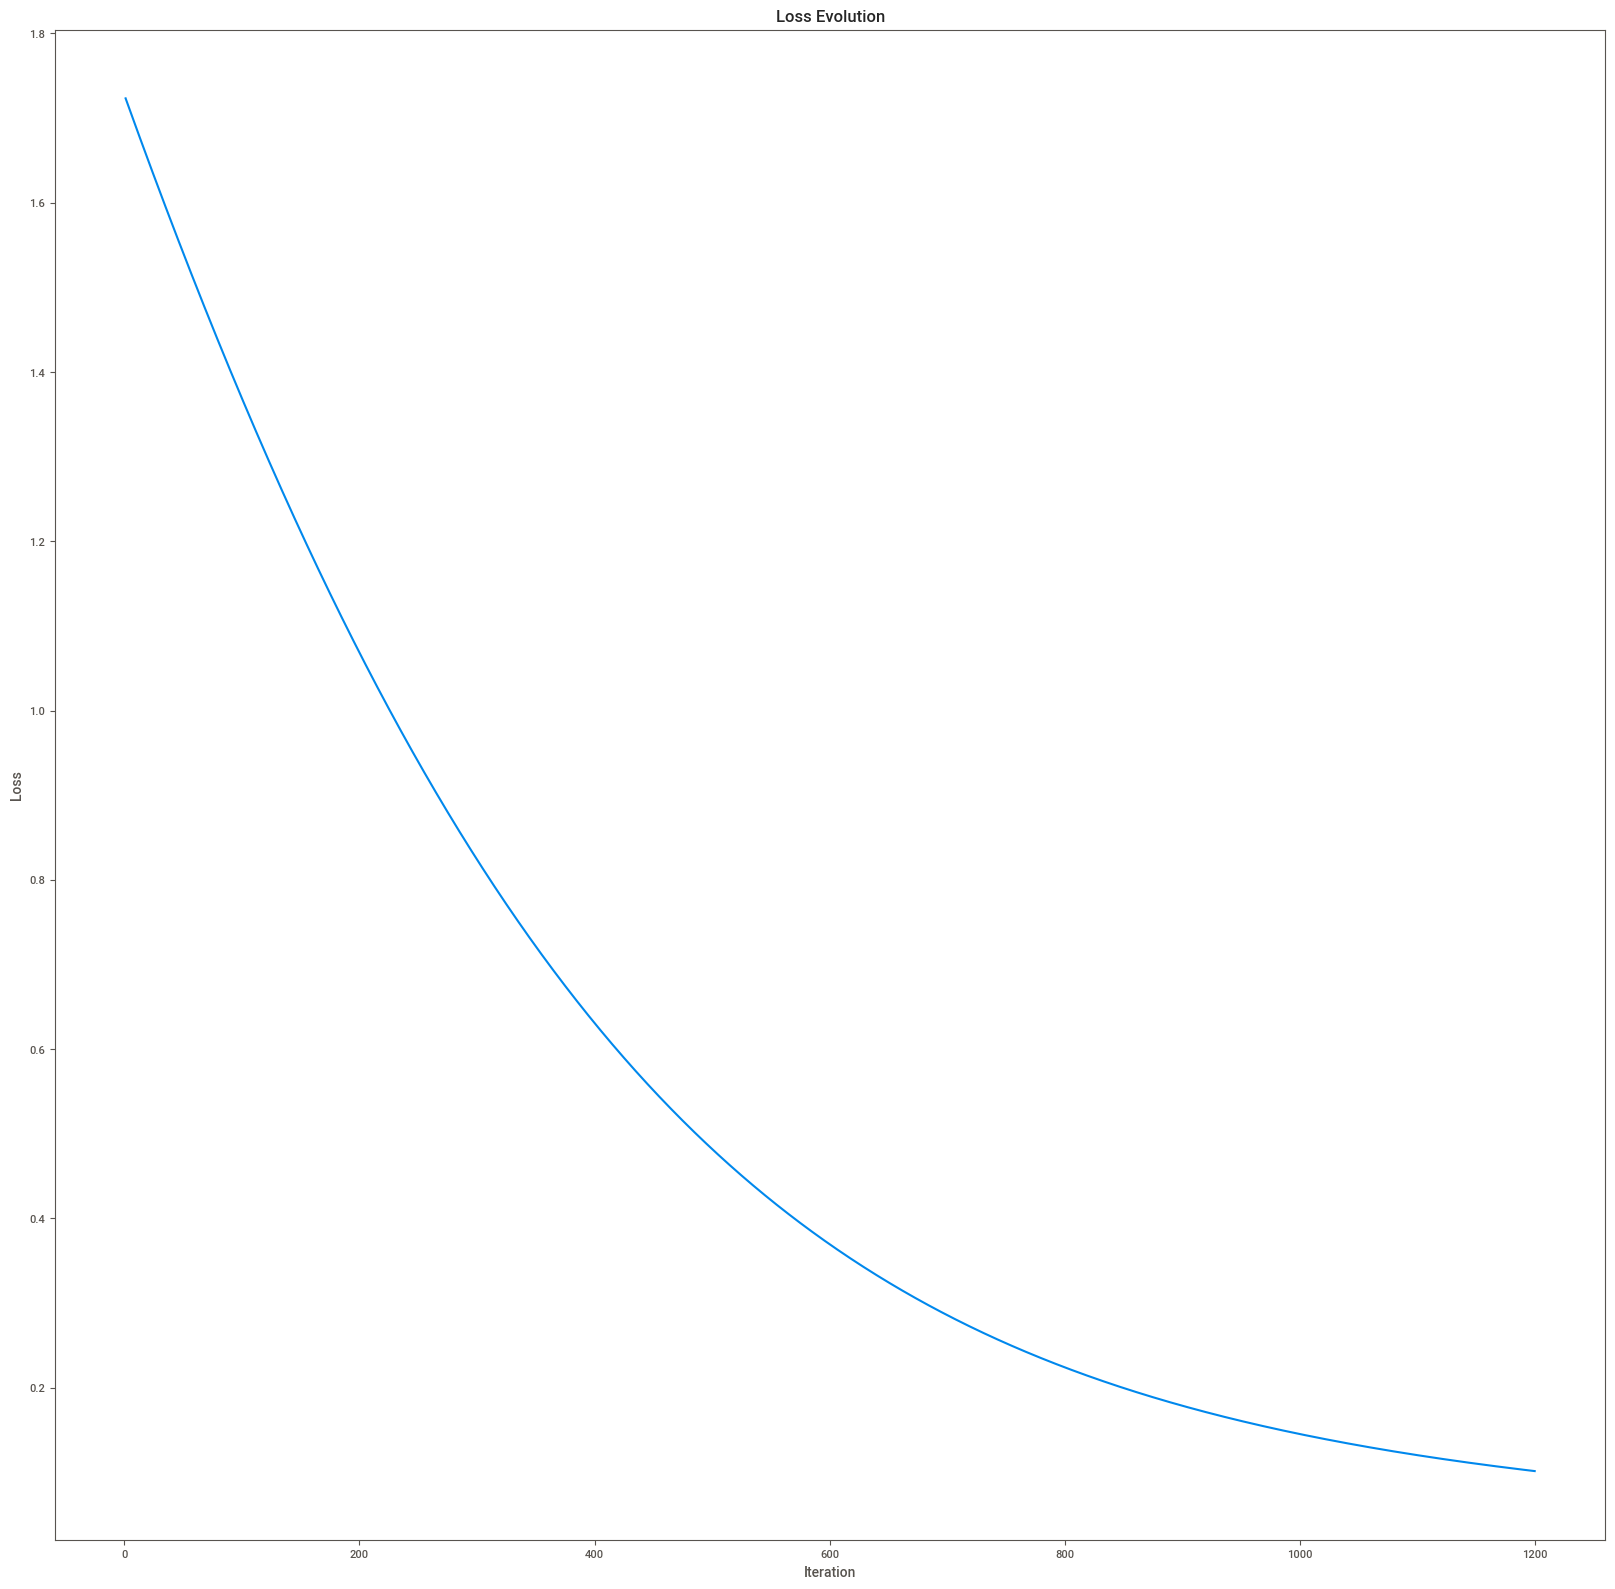

In [54]:
model.plot_loss(losses)